# Stack Overflow

## Introduction 

In the second part of this assignment, we will create and analyze time series of creation dates of Stack Overflow questions. This assignment is to be completed **INDIVIDUALLY** and it is due on **October 7 at 7pm**.

Let's create some time series from the data. You may choose to analyze either users or tags. To analyze users, take the top 100 users with the most question posts. For each user, your time series will be the number of questions posted by that user at some frequency. To analyze tags, take the top 100 most popular question tags. For each tag, your time series will be the number of questions with that tag at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze tags and sample during different hours of the day, your hypothesis could be that languages (i.e. Javascript) that are used more in industry will have more questions posted during work hours, whereas languages (i.e. Python) that are taught in academia will have more questions posted after midnight when students are scrambling to finish their homework.

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data, what timeseries you created, what method you chose and why. **(30 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

Expectation: I expect to find out the users will raise most question on the end of semesters and maybe least during summer hours
Timeseries: I will extract the questions each user raised for 2015 and pack each time into each day and then again to each month since it's easier for us to figure out the trend.
Method: I will use Euclidean method as norm 2 to find out the distance between each userId, this is because this algorithm is based on the least square error which I believe for low level dimension cases it's more convinient than others.

In [401]:
import sys
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
from collections import Counter
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import iterparse
from datetime import datetime
import csv
import numpy as np
import operator
df = pd.read_csv('question_dataframe.csv')
list_userID = []
list_userID = df.values.T.tolist()
list_top100user = Counter(list_userID[2]).most_common(100)
df_top100user = DataFrame(list_top100user, columns = ['OwnerUserId','Frequency'])
list_2list = []
ind = df.OwnerUserId.isin(df_top100user.OwnerUserId)

In [402]:
# need to get a new dataframe with combined dataframe according to bool value list
# this is a new data frame with each userId's date
new_df = DataFrame(columns = ('CreationDate','Id', 'OwnerUserId','Tags'))
new_df_2 = new_df.append(df[ind])

In [403]:
# convert the dataframe's exact date into date:
import calendar
import datetime
new_df_2['CreationDate'] = pd.to_datetime(new_df_2['CreationDate'])

In [404]:
import numpy
new_df_2
new_df_newtime = new_df_2.copy(deep = True)
new_df_newtime
new_df_newtime['CreationDate'] = new_df_2['CreationDate'].map(
    lambda x: datetime.datetime(
        x.year,
        x.month,
        x.day
    )
)
new_df_newtime_series = new_df_newtime.groupby('OwnerUserId')['CreationDate'].apply(list)

In [405]:
import math
import numpy as np
total_date_list_alluser = []
total_list_alluser = []
total_list_alluser = list(new_df_newtime_series.keys())
# remember new_df_newtime_series contins the owneruser id
for date_index in range(len(new_df_newtime_series)):
    list_all_ones = []
    list_all_ones = [1] * len(new_df_newtime_series[date_index])
    series_date_range = pd.Series(list_all_ones, index = new_df_newtime_series[date_index])
    s_try = series_date_range.resample('1M').sum()
    date_list = s_try.tolist()
    for n,i in enumerate(date_list):
        if math.isnan(date_list[n]):
            date_list[n] = 0.0
    total_date_list_alluser.append(date_list)
#     the date_list stores the list per month each user

In [406]:
for i in range(len(total_date_list_alluser)):
    if (12 - len(total_date_list_alluser[i]) != 0):
        for insert_index in range(12 - len(total_date_list_alluser[i])):
            total_date_list_alluser[i].insert(insert_index , 0)

In [407]:
new_df_cdnou = new_df_newtime_series.to_frame()
index_1 = pd.date_range('1/1/2015',periods = 12, freq = 'M')
index_date_list = []
for index_1_1 in index_1:
    index_date_list.append(index_1_1)
index_date_list
series = pd.Series(index_1, index = range(12))
ser_list = series.tolist()
ser_list2 = []
for year in range(2015,2016):
    for month in range(1,13):
        ser_list2.append(datetime.datetime(year = year, month = month, day = 1))

In [408]:
# total_list_alluser
# total_date_list_alluser
import numpy as np
import matplotlib.pyplot as plt
month_list_num = range(12)
month_list = ser_list2



In [409]:
new_list_month_num = [x + 1 for x in month_list_num]

In [410]:
#define euclide distance function
def euclide_dist(a,b):
    diff = 0
    for i in range(12):
        diff+= (a[i] - b[i])** 2
    diff = diff ** (1/2)
    return diff

In [411]:
from scipy.spatial import distance
# change a list of list to a list of tuple:
matrix_100users = np.ones((100, 100))
matrix_100users
for plot_index_2 in range(len(total_date_list_alluser)):
    for plot_index in range(len(total_date_list_alluser)):
        dist_euc = euclide_dist(total_date_list_alluser[plot_index],total_date_list_alluser[plot_index_2])
        matrix_100users[plot_index,plot_index_2] = dist_euc

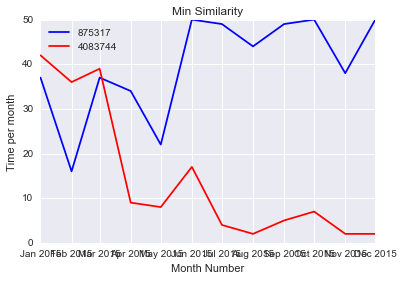

Max similarity is between blue 875317 and red 4083744


In [412]:
%matplotlib inline
import matplotlib.pylab
for i in range(len(total_date_list_alluser)):
    for j in range(len(total_date_list_alluser)):
        if (matrix_100users[i][j] == matrix_100users.max()):
            y_val_1 = total_date_list_alluser[i]
            y_val_2 = total_date_list_alluser[j]
            y_val_tuple_1 =tuple(y_val_1)
            y_val_tuple_2 =tuple(y_val_2)
            x_val = month_list
            idx_i = i
            idx_j = j
            break
plt.plot(x_val,y_val_1,'b',label = total_list_alluser[idx_i])
plt.plot(x_val,y_val_2,'r',label = total_list_alluser[idx_j])
plt.ylabel('Time per month')
plt.xlabel('Month Number')
plt.title('Min Similarity')
plt.legend(loc = 'upper left')
plt.show()
print('Max similarity is between blue {} and red {}'.format(total_list_alluser[idx_i], total_list_alluser[idx_j]))      

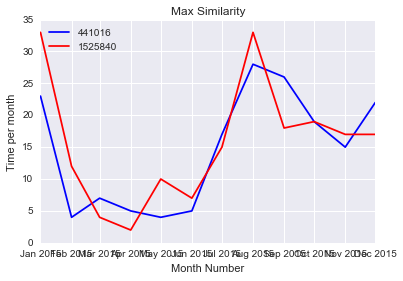

Max similarity is between blue 441016 and red 1525840


In [413]:
%matplotlib inline
minval = np.min(matrix_100users[np.nonzero(matrix_100users)])
for i in range(len(total_date_list_alluser)):
    for j in range(len(total_date_list_alluser)):
        if (matrix_100users[i][j] == minval):
            y_val_1 = total_date_list_alluser[i]
            y_val_2 = total_date_list_alluser[j]
            y_val_tuple_1 =tuple(y_val_1)
            y_val_tuple_2 =tuple(y_val_2)
            x_val = month_list
            idx_i = i
            idx_j = j
            break
plt.plot(x_val,y_val_1,'b',label = total_list_alluser[idx_i])
plt.plot(x_val,y_val_2,'r', label = total_list_alluser[idx_j])
plt.ylabel('Time per month')
plt.xlabel('Month Number')
plt.title('Max Similarity')
plt.legend(loc = 'upper left')
plt.show()
print('Max similarity is between blue {} and red {}'.format(total_list_alluser[idx_i], total_list_alluser[idx_j]))

So this is the result I got for euclidean distance norm L2 similarity method for the questions users raised every month in 2015 on stackflow website. And we can find out the max usage is almost on Jan and Sempter which is the end of semester and also Semptember is because maybe many engineers are back from vacation so they are catching up on finishing their work left over before summer vacation.

Choose a different distance/similarity metric and repeat the same time series analysis. Compare the two different metrics you used. **(10 pts)**

In this problem I choose to use the mahattan distance method to do the same time series analysis. I'm expecting similar results derived from previous method.

In [414]:
from math import*
def mahattan_distance(x,y):
    return sum(abs(a-b) for a, b in zip(x,y))

In [415]:
import scipy.spatial.distance as ssd
matrix_100users2 = np.ones((100, 100))
for plot_index_2 in range(len(total_date_list_alluser)):
    for plot_index in range(len(total_date_list_alluser)):
        dist_mahattan = mahattan_distance(total_date_list_alluser[plot_index],total_date_list_alluser[plot_index_2])
        matrix_100users2[plot_index,plot_index_2] = dist_mahattan

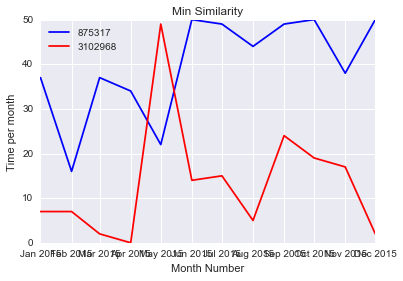

Max similarity is between blue userId 875317 and red userId 3102968


In [416]:
%matplotlib inline
import matplotlib.pylab
for i in range(len(total_date_list_alluser)):
    for j in range(len(total_date_list_alluser)):
        if (matrix_100users2[i][j] == matrix_100users2.max()):
            y_val_1 = total_date_list_alluser[i]
            y_val_2 = total_date_list_alluser[j]
            y_val_tuple_1 =tuple(y_val_1)
            y_val_tuple_2 =tuple(y_val_2)
            x_val = month_list
            idx_i = i
            idx_j = j
            break
plt.plot(x_val,y_val_1,'b',label = total_list_alluser[idx_i])
plt.plot(x_val,y_val_2,'r', label = total_list_alluser[idx_j])
plt.ylabel('Time per month')
plt.xlabel('Month Number')
plt.title('Min Similarity')
plt.legend(loc = 'upper left')
plt.show()
print('Max similarity is between blue userId {} and red userId {}'.format(total_list_alluser[idx_i], total_list_alluser[idx_j]))      

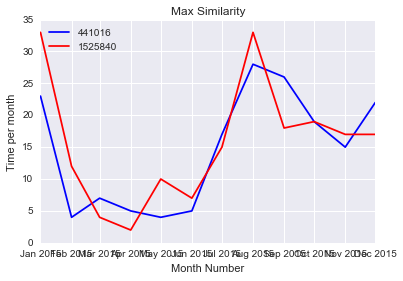

Max similarity is between blue 441016 and red 1525840


In [417]:
%matplotlib inline
minval = np.min(matrix_100users2[np.nonzero(matrix_100users2)])
for i in range(len(total_date_list_alluser)):
    for j in range(len(total_date_list_alluser)):
        if (matrix_100users2[i][j] == minval):
            y_val_1 = total_date_list_alluser[i]
            y_val_2 = total_date_list_alluser[j]
            y_val_tuple_1 =tuple(y_val_1)
            y_val_tuple_2 =tuple(y_val_2)
            x_val = month_list
            idx_i = i
            idx_j = j
            break
plt.plot(x_val,y_val_1,'b', label = total_list_alluser[idx_i])
plt.plot(x_val,y_val_2,'r', label = total_list_alluser[idx_j])
plt.ylabel('Time per month')
plt.xlabel('Month Number')
plt.title('Max Similarity')
plt.legend(loc = 'upper left')
plt.show()
print('Max similarity is between blue {} and red {}'.format(total_list_alluser[idx_i], total_list_alluser[idx_j]))

From the result I think this method is very similar to norm 2 as for low level dimensions, however, intuitively, mahattan's distance is larger than that of norm 2 method. For max similarity we can get the same result for both, while for min similarity the result is a little bit different, the reason I'm thinking of is because every time mahattan deals with one dimension each time so it will perform better if the dimension increases significantly.